In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.4.0 installed at /home/carter/.venv.camb/lib/python3.10/site-packages/camb


In [2]:
def get_minima(val_list, criteria = 2, offset=0):
    extrema = []
    #test for minimum
    for i in np.arange(len(val_list)-2*criteria-1):
        min = True
        for j in np.arange(1, criteria):
            min = min and val_list[i+criteria] < val_list[i+criteria-j] and val_list[i+criteria]<val_list[i+criteria+j]
        if(min):
            extrema.append([val_list[i+criteria], i+criteria+offset])
    return np.array(extrema)

def get_maxima(val_list, criteria = 2, offset=0):
    extrema = []
    #test for maximum
    for i in np.arange(len(val_list)-2*criteria-1):
        min = True
        for j in np.arange(1, criteria):
            min = min and val_list[i+criteria] > val_list[i+criteria-j] and val_list[i+criteria]>val_list[i+criteria+j]
        if(min):
            extrema.append([val_list[i+criteria], i+criteria+offset])
    return np.array(extrema)

# Examining the difference between total and lensed_scalar CAMB results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


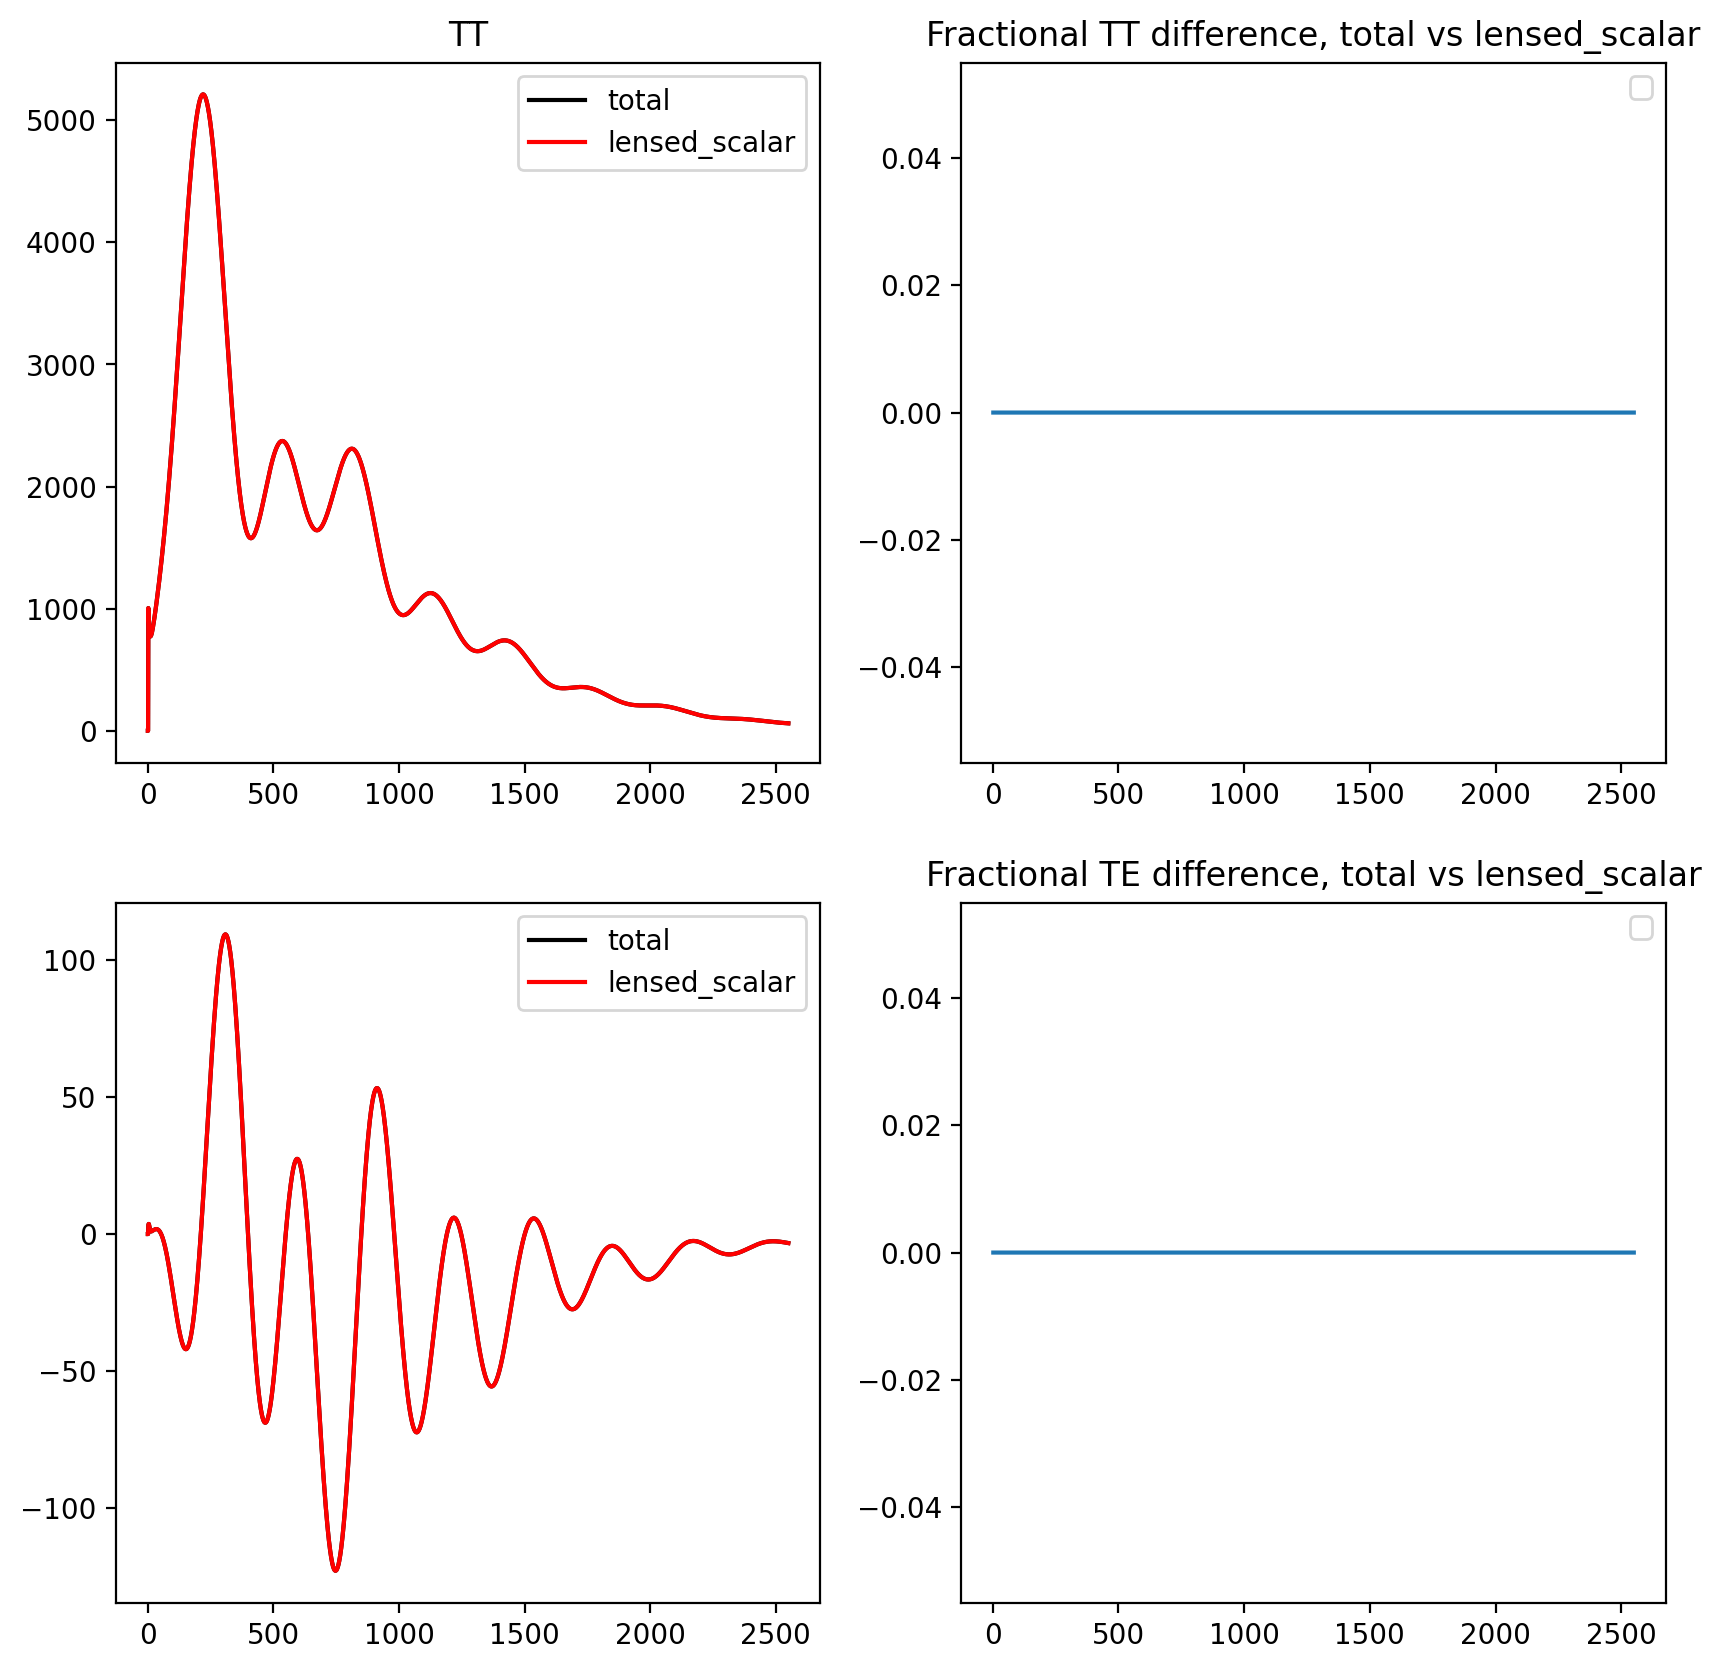

In [3]:
fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0,0].set_title('TT')
vals_and_colors = np.array([[67.4, 'green'],[73.3, 'blue']])
for H in [67.4]:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    totCL = powers['total']
    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(totCL.shape[0])
    ax[0,0].plot(ls, totCL[:,0], color='k', label='total')
    ax[0,0].plot(ls, lensedCL[:,0], color='r', label ='lensed_scalar')

    ax[0,1].plot(ls[2:], 1-lensedCL[2:,0]/totCL[2:,0])
    ax[0,1].set_title('Fractional TT difference, total vs lensed_scalar')

    ax[1,0].plot(ls, totCL[:,3], color='k', label='total')
    ax[1,0].plot(ls, lensedCL[:,3], color='r', label ='lensed_scalar')

    ax[1,1].plot(ls[2:], 1-lensedCL[2:,3]/totCL[2:,3])
    ax[1,1].set_title('Fractional TE difference, total vs lensed_scalar')
for axl in np.array(ax).flatten():
    axl.legend()
plt.show()

# CMB temperature and polarization spectra for various values of $H_0$.

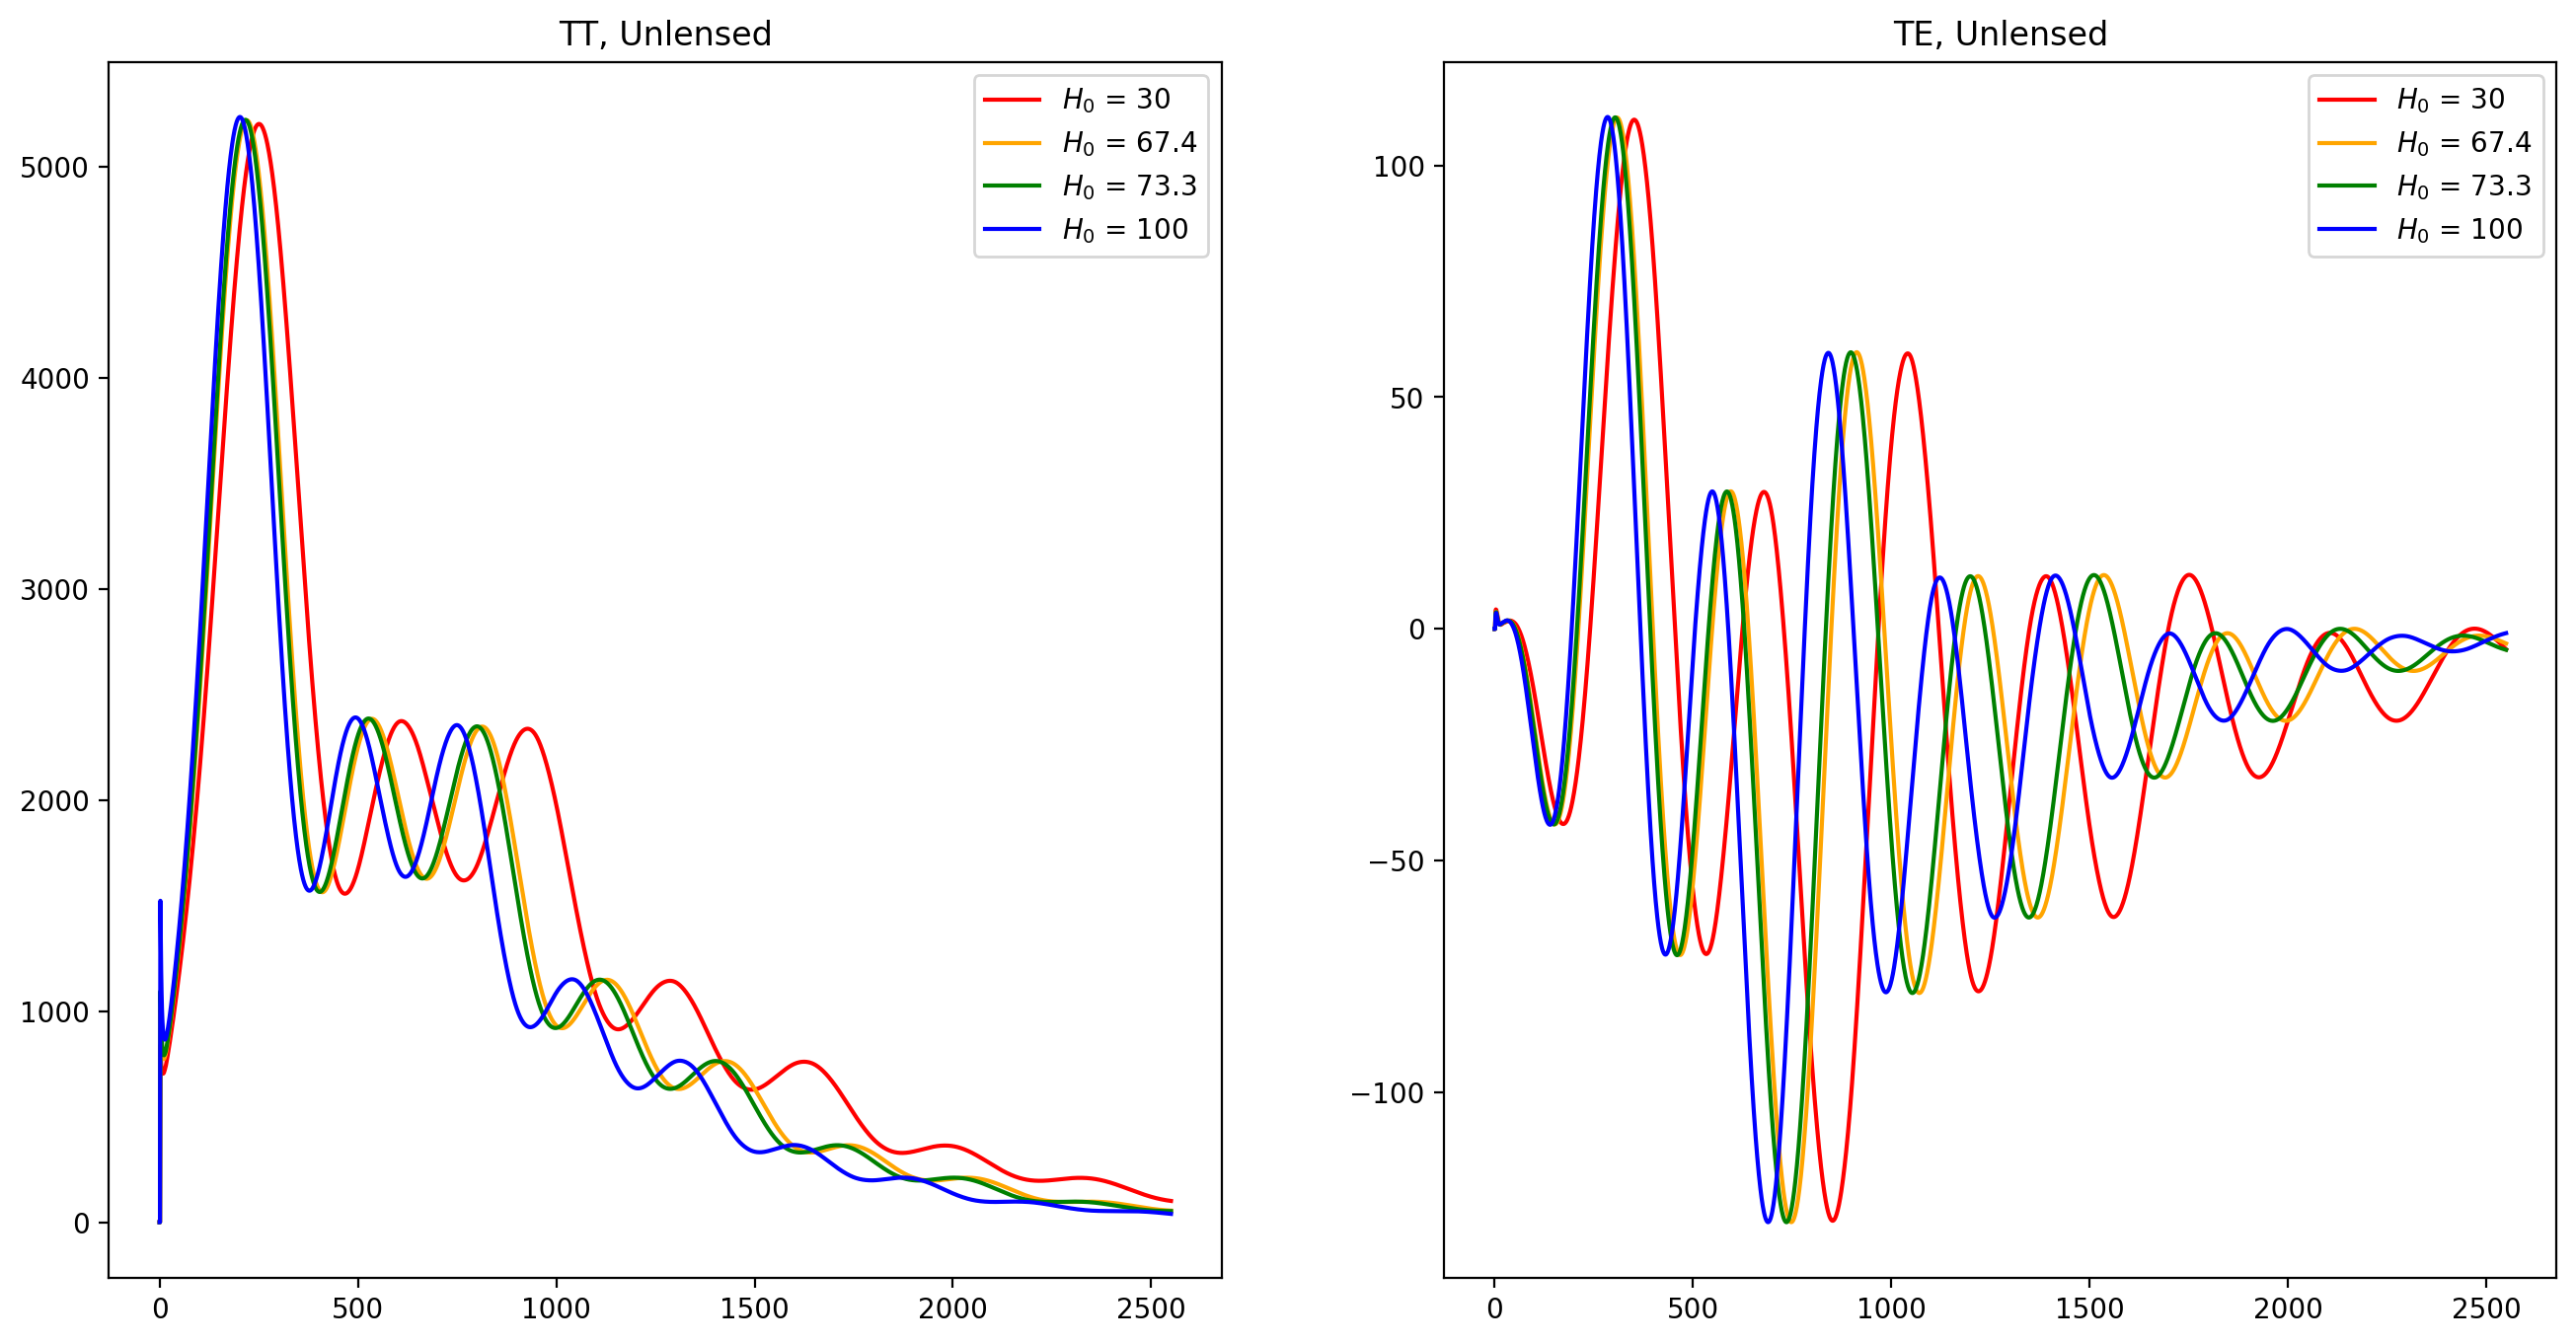

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].set_title('TT, Unlensed')
ax[1].set_title('TE, Unlensed')
#list of parameter values and their respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[30, 'red', 'darkred'],[67.4, 'orange', 'darkorange'],[73.3, 'green', 'darkgreen'], [100, 'blue', 'darkblue']])
for i in vals_and_colors:
    H = float(i[0])
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=H)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label='$H_0$ = ' +i[0])
    #ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label='$H_0$ = ' +i[0])
    #ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, H_0 = ' +str(i[0]))
    
    ax[1].plot()
for axl in np.array(ax).flatten():
    axl.legend()
plt.show()

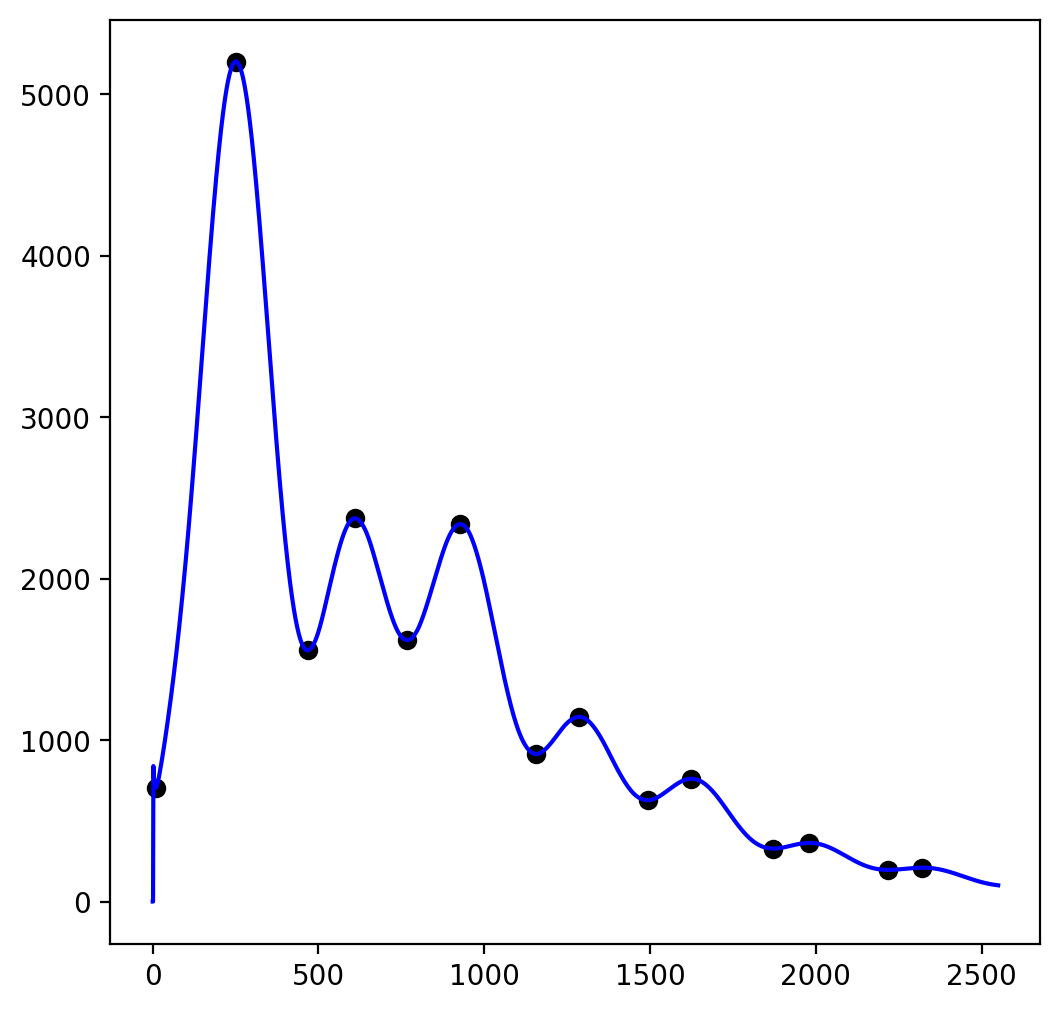

In [5]:
# Testing get_maxima and get_minima fcns
fig, ax = plt.subplots(1,1,figsize=(6,6))
pars = camb.CAMBparams()
pars.set_cosmology(H0=30)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

unlensedCL=powers['unlensed_scalar']
lensedCL = powers['lensed_scalar']
ls = np.arange(unlensedCL.shape[0])
ax.plot(ls, unlensedCL[:,0], color=i[1], label='$H_0$ = ' +i[0])


maxima = get_maxima(unlensedCL[:,0], criteria = 5)
ax.scatter(maxima[:,1], maxima[:,0], color='k')

minima = get_minima(unlensedCL[:,0], criteria = 5)
ax.scatter(minima[:,1], minima[:,0], color='k')

np.savetxt('30_maxima.csv', maxima, delimiter=',')
np.savetxt('30_minima.csv', minima, delimiter=',')

plt.show()

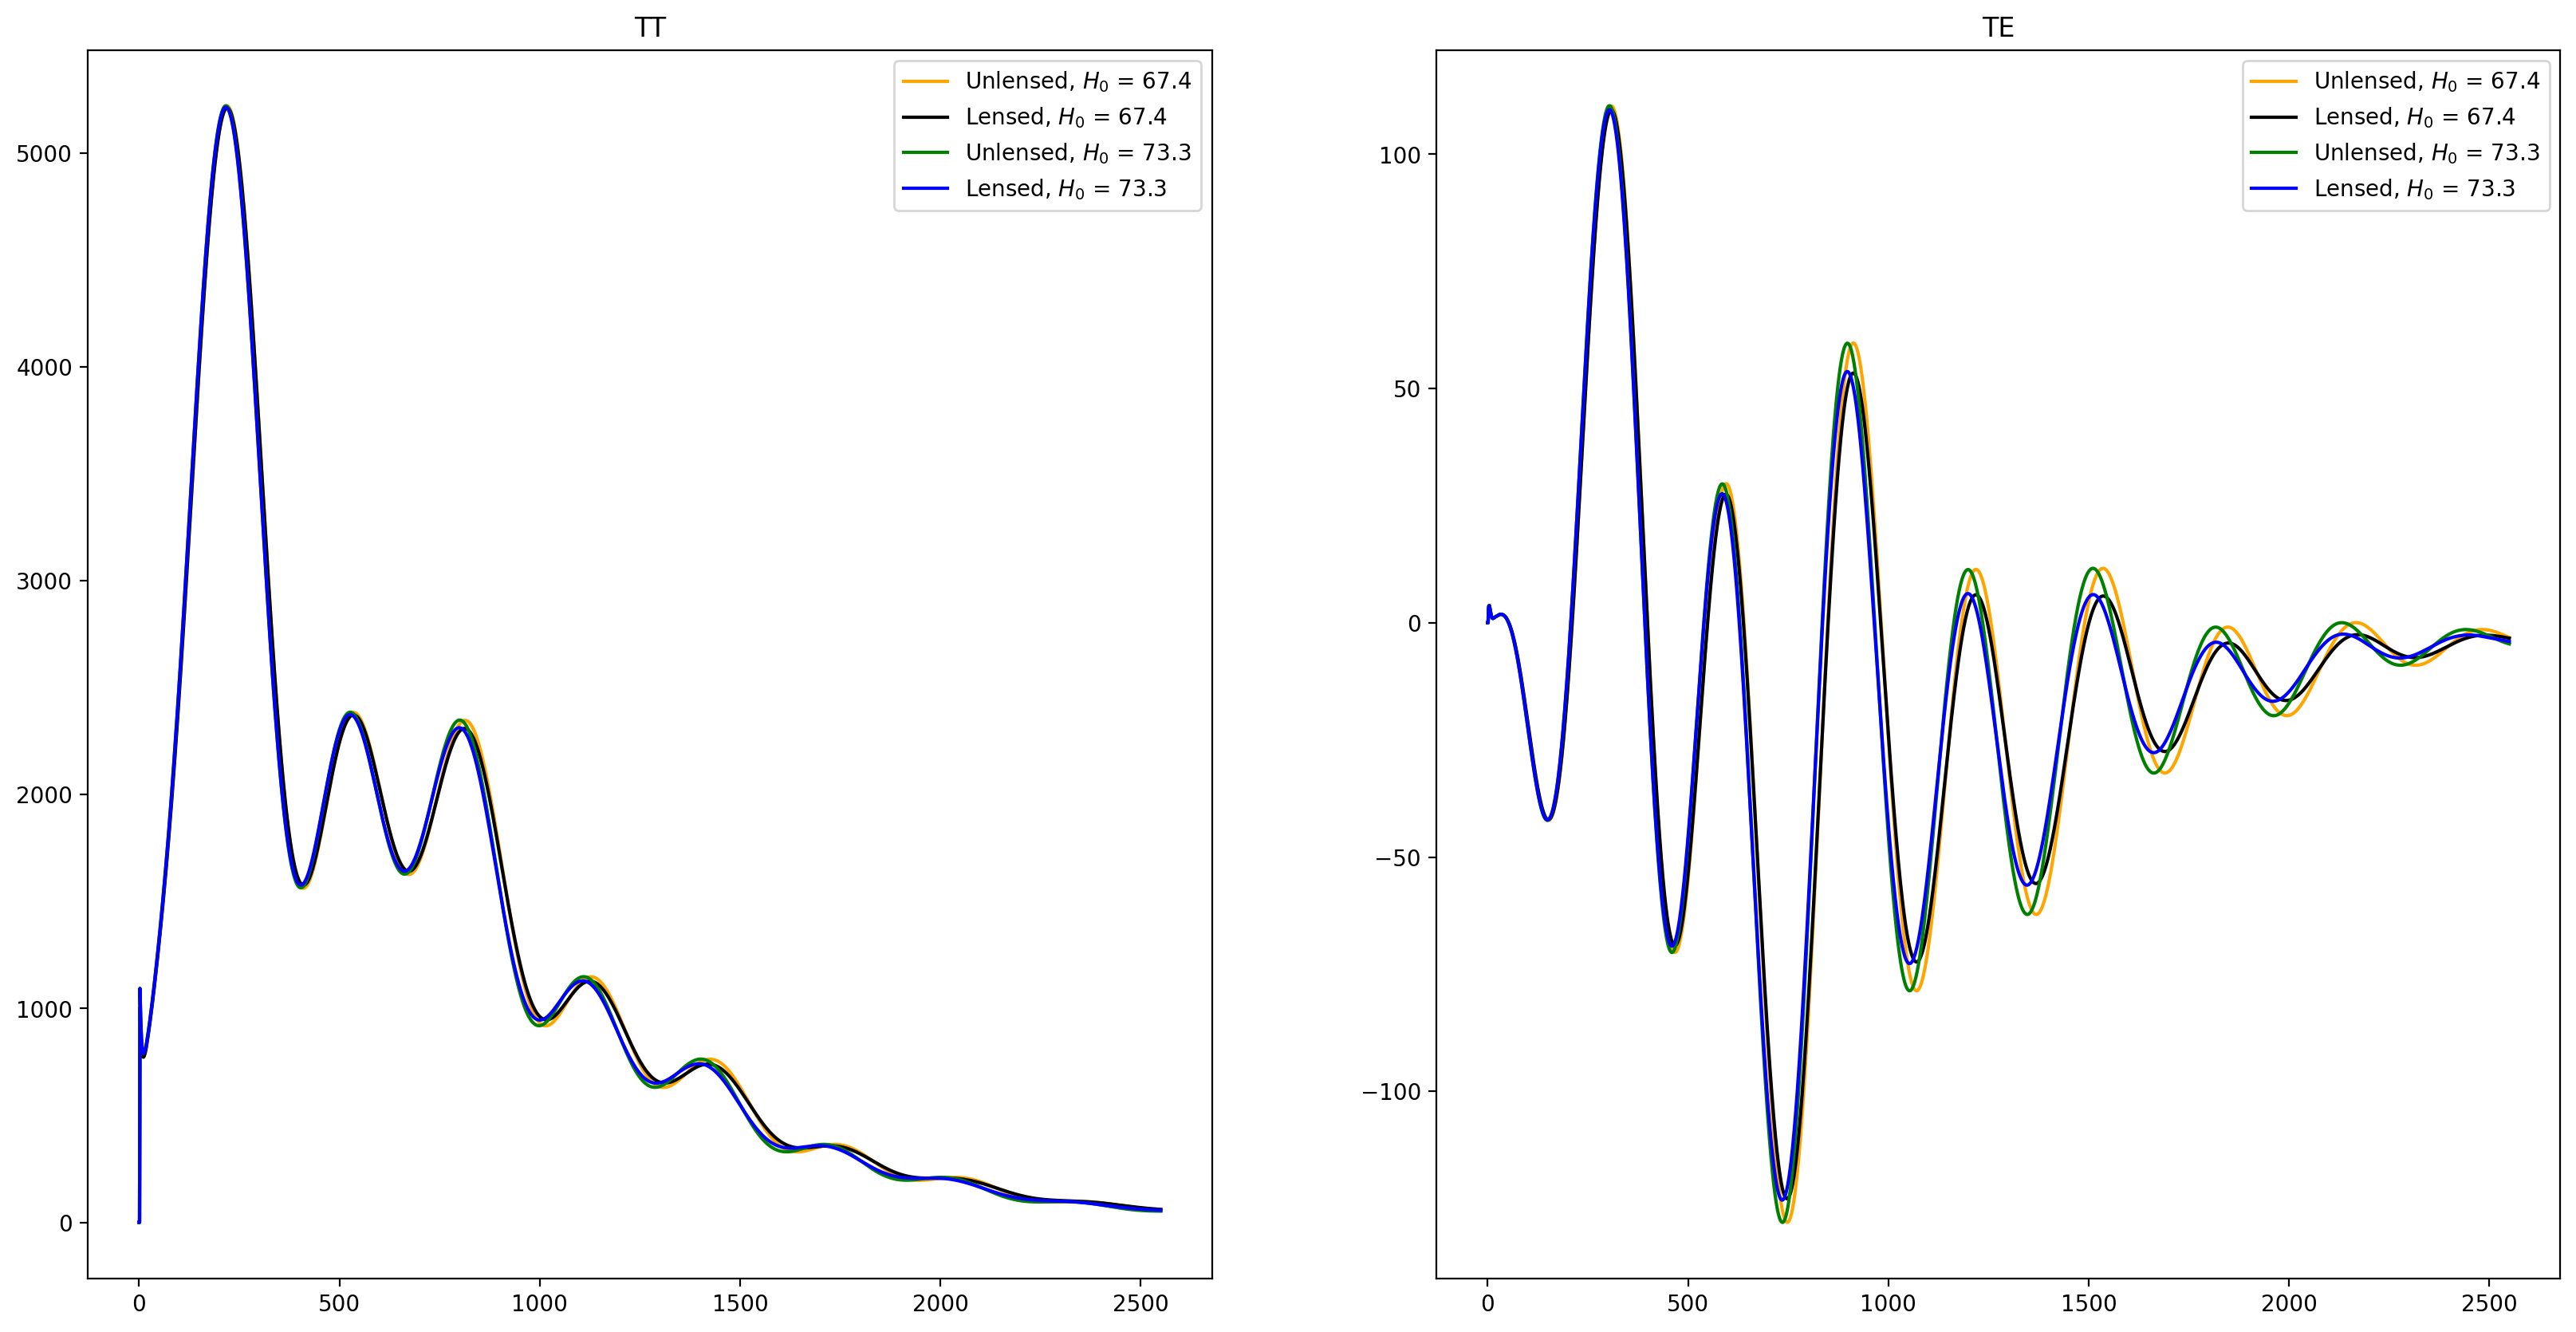

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].set_title('TT')
ax[1].set_title('TE')
#list of parameter values and respective colors to be plotted, in the form [param, unlensed color, lensed color]
vals_and_colors = np.array([[67.4, 'orange', 'black'],[73.3, 'green', 'blue']])
for i in vals_and_colors:
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=float(i[0]))
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

    unlensedCL=powers['unlensed_scalar']
    lensedCL = powers['lensed_scalar']
    ls = np.arange(unlensedCL.shape[0])
    ax[0].plot(ls, unlensedCL[:,0], color=i[1], label='Unlensed, $H_0$ = ' +str(i[0]))
    ax[0].plot(ls, lensedCL[:,0] , color=i[2], label ='Lensed, $H_0$ = ' +str(i[0]))

    ax[1].plot(ls, unlensedCL[:,3], color=i[1], label='Unlensed, $H_0$ = ' +str(i[0]))
    ax[1].plot(ls, lensedCL[:,3] , color=i[2], label ='Lensed, $H_0$ = ' +str(i[0]))
for axl in np.array(ax).flatten():
    axl.legend()
plt.show()